In [137]:
# importing required libraries
import matplotlib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import silhouette_score, silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import pyvista as pv
import vtk
import os
from vtk import vtkStructuredPoints
from skimage import io, transform
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import matplotlib.colors as mcolors

In [138]:
df = pd.read_csv("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Datasets/Patch13_3/Professional/FinalProfessionalPlayersDataset.csv", dtype = {'skillSlot': str, 'buildingType': str, 'lane': str, 'monster': str, "itemName": str})
df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
0,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,0.000000,554.0,581.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
1,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.000300,3177.0,8848.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
2,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,2.000733,2665.0,13301.0,1.0,2.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
3,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.932467,NaN,NaN,NaN,NaN,...,NaN,NaN,False,SkillLevelUp,1.0,NaN,NaN,NaN,NaN,TOP
4,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,3.001000,3352.0,13461.0,3.0,14.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392066,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.473867,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Locket of the Iron Solari,BOTTOM
392067,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.488683,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392068,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.491417,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392069,NA1_4573614609,Red,anonymous 97,na1,Kaisa,26.337567,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Null-Magic Mantle,BOTTOM


In [139]:
top_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"].isna())]
top_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
5904,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,0.000000,14176.0,14506.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
5905,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,1.000067,8193.0,10180.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
5906,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,2.000383,10360.0,7867.0,2.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
5909,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,3.000767,11796.0,7451.0,3.0,0.0,...,0.0,18.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
5910,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,4.001050,1263.0,11706.0,3.0,0.0,...,64.0,74.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275770,KR_6376019501,Red,anonymous 49,kr,Gragas,20.005683,10601.0,7668.0,11.0,5.0,...,802.0,419.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275772,KR_6376019501,Red,anonymous 49,kr,Gragas,21.005883,4514.0,10154.0,11.0,6.0,...,976.0,522.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275773,KR_6376019501,Red,anonymous 49,kr,Gragas,22.006183,9666.0,3361.0,12.0,6.0,...,1028.0,522.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275776,KR_6376019501,Red,anonymous 49,kr,Gragas,23.006417,1082.0,1188.0,13.0,8.0,...,1353.0,1522.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE


Champions' winrates

In [140]:
profiling_df = top_deaths_df[(top_deaths_df["victory"] == True)].copy()

In [141]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1

#print("Victories with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['victories'])
#champs_df.sort_values(by=["victories"], ascending=False)
#print(champs)
    

In [142]:
profiling_df = top_deaths_df[(top_deaths_df["victory"] == False)].copy()

In [143]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df2 = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df2[0])] = champs[str(champs_df2[0])] + 1
    except:
        champs[str(champs_df2[0])] = 1

champs_df2 = pd.DataFrame.from_dict(champs, orient="index", columns=['defeats'])

champs_winrate = [champs_df, champs_df2]
champs_winrate_df = pd.concat(champs_winrate, axis=1)

champsWinrates = []
for row in champs_winrate_df.iterrows():
    champsWinrates_row = {}
    if(np.isnan(row[1][0])):
        row[1][0] = 0
    if(np.isnan(row[1][1])):
        row[1][1] = 0
    champsWinrates_row["champion"] = str(row[0])
    champsWinrates_row["win rate"] = round(row[1][0]/(row[1][0] + row[1][1]), 2)
    champsWinrates_row["matches"] = row[1][0] + row[1][1]

    champsWinrates.append(champsWinrates_row)

champsWinrates_df = pd.DataFrame(champsWinrates).set_index(["champion"])
champsWinrates_df.sort_values(by=["matches", "win rate"], ascending= False)

,win rate,matches
champion,,
LeeSin,0.59,113.0
Vi,0.57,69.0
Gragas,0.59,59.0
Elise,0.62,56.0
Sylas,0.54,54.0
Nidalee,0.52,54.0
Maokai,0.67,52.0
MonkeyKing,0.58,52.0
Kindred,0.54,50.0


In [144]:
print("This dataset contains {} matches in which the top died at least once".format(len(np.unique(top_deaths_df["gameId"]))))

This dataset contains 847 matches in which the top died at least once


In [145]:
print("{} players died a total of {} times".format(len(np.unique(top_deaths_df["summoner"])), top_deaths_df.shape[0]))

20 players died a total of 23724 times


In [146]:
print("This Dataset contains an average of {} deaths per game".format((top_deaths_df.shape[0]/len(np.unique(top_deaths_df["gameId"])))))

This Dataset contains an average of 28.009445100354192 deaths per game


In [147]:
blueSide_top_deaths_df = top_deaths_df[top_deaths_df["team"] == "Blue"]
blueSide_top_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
6151,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,0.000000,557.0,345.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6152,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,1.000117,5281.0,9076.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6153,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,2.000583,2682.0,8436.0,2.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6156,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,3.000883,9684.0,2577.0,3.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6158,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,4.001017,11260.0,4972.0,3.0,0.0,...,14.0,48.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275394,NA1_4584524732,Blue,anonymous 41,na1,Poppy,26.009117,2980.0,11546.0,13.0,18.0,...,1304.0,784.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275396,NA1_4584524732,Blue,anonymous 41,na1,Poppy,27.009233,3041.0,8132.0,13.0,18.0,...,1304.0,784.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275397,NA1_4584524732,Blue,anonymous 41,na1,Poppy,28.009250,7145.0,4977.0,14.0,21.0,...,1304.0,912.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275400,NA1_4584524732,Blue,anonymous 41,na1,Poppy,29.009800,2580.0,10011.0,14.0,22.0,...,1431.0,912.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [148]:
gamesBlueSide = len(np.unique(blueSide_top_deaths_df["gameId"]))
gamesBlueSide

377

In [149]:
players_df = np.unique(blueSide_top_deaths_df["summoner"])
for player in players_df:
    temp_df = blueSide_top_deaths_df[blueSide_top_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 24 played 14 matches
anonymous 25 played 20 matches
anonymous 26 played 31 matches
anonymous 27 played 15 matches
anonymous 28 played 8 matches
anonymous 29 played 33 matches
anonymous 30 played 34 matches
anonymous 31 played 22 matches
anonymous 32 played 27 matches
anonymous 34 played 29 matches
anonymous 35 played 15 matches
anonymous 36 played 23 matches
anonymous 37 played 21 matches
anonymous 41 played 12 matches
anonymous 43 played 8 matches
anonymous 46 played 6 matches
anonymous 48 played 13 matches
anonymous 49 played 19 matches
anonymous 50 played 18 matches
anonymous 51 played 9 matches


In [150]:
print("Blue side contains {} matches in which the top died at least once".format(len(np.unique(blueSide_top_deaths_df["gameId"]))))

Blue side contains 377 matches in which the top died at least once


In [151]:
print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSide_top_deaths_df["summoner"])), blueSide_top_deaths_df.shape[0]))

20 players died a total of 10273 times on the blue side


In [152]:
redSide_top_deaths_df = top_deaths_df[top_deaths_df["team"] == "Red"]
redSide_top_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
5904,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,0.000000,14176.0,14506.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
5905,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,1.000067,8193.0,10180.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
5906,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,2.000383,10360.0,7867.0,2.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
5909,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,3.000767,11796.0,7451.0,3.0,0.0,...,0.0,18.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
5910,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,4.001050,1263.0,11706.0,3.0,0.0,...,64.0,74.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275770,KR_6376019501,Red,anonymous 49,kr,Gragas,20.005683,10601.0,7668.0,11.0,5.0,...,802.0,419.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275772,KR_6376019501,Red,anonymous 49,kr,Gragas,21.005883,4514.0,10154.0,11.0,6.0,...,976.0,522.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275773,KR_6376019501,Red,anonymous 49,kr,Gragas,22.006183,9666.0,3361.0,12.0,6.0,...,1028.0,522.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275776,KR_6376019501,Red,anonymous 49,kr,Gragas,23.006417,1082.0,1188.0,13.0,8.0,...,1353.0,1522.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [153]:
gamesRedSide = len(np.unique(redSide_top_deaths_df["gameId"]))
gamesRedSide

489

In [154]:
players_df = np.unique(redSide_top_deaths_df["summoner"])
for player in players_df:
    temp_df = redSide_top_deaths_df[redSide_top_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 24 played 25 matches
anonymous 25 played 40 matches
anonymous 26 played 44 matches
anonymous 27 played 17 matches
anonymous 28 played 12 matches
anonymous 29 played 35 matches
anonymous 30 played 31 matches
anonymous 31 played 42 matches
anonymous 32 played 37 matches
anonymous 34 played 31 matches
anonymous 35 played 18 matches
anonymous 36 played 25 matches
anonymous 37 played 20 matches
anonymous 41 played 17 matches
anonymous 43 played 15 matches
anonymous 46 played 11 matches
anonymous 48 played 23 matches
anonymous 49 played 30 matches
anonymous 50 played 9 matches
anonymous 51 played 7 matches


In [155]:
print("Red side contains {} matches in which the top died at least once".format(len(np.unique(redSide_top_deaths_df["gameId"]))))

Red side contains 489 matches in which the top died at least once


In [156]:
print("{} players died a total of {} times on the red side".format(len(np.unique(redSide_top_deaths_df["summoner"])), redSide_top_deaths_df.shape[0]))

20 players died a total of 13451 times on the red side


function to visualize the results

In [157]:
def visualizeResults(df, data_scaled, model, team, kmeans, cluster_colors,details = "None"):
    # Visualize the results
    image = plt.imread("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Clustering Analyses/map11.png")
    fig, ax = plt.subplots()
    ax.imshow(image, extent=[0, 16000, 0, 16000])

    #scatter = ax.scatter(df['coordinate_x'], df['coordinate_y'], c=df['cluster'], cmap="plasma")
    #colors = np.array(["blueviolet", "yellow", "lime", "crimson"])
    
    for c in np.unique(df["cluster"]):
        temp_df = df[df["cluster"] == c]
        scatter = ax.scatter(temp_df['coordinate_x'], temp_df['coordinate_y'], color = cluster_colors[c])
    plt.xlabel('X')
    plt.ylabel('Y')


    if(details == "None"):
        title = "Top Players' locations in the " + team + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"]) 
    else:
        title = "Top Players' locations in the " + team + " " + details + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"])
    plt.title(title)
    plt.grid(visible=None)

    lg = ax.legend(["0", "1", "2", "3"], frameon = True, loc='center left', bbox_to_anchor=(1, 0.7),
            fancybox=True, shadow=True)
    lg.get_frame().set_linewidth(1)
    lg.get_frame().set_edgecolor("black")

    plt.show()

    #drawSillouette(data_scaled, model.labels_, silhouetteTitle)
    silhouette_visualizer(kmeans, data_scaled, colors=cluster_colors, title = title)

    print("Silhouette score: {}".format(silhouette_score(data_scaled, model.labels_)))
    print("{}".format(df["cluster"].value_counts()))

    colors = []
    for color in cluster_colors:
        colors.append(matplotlib.colors.cnames[color])


    return colors

function to view the average values in each cluster

In [158]:
def clusterMeanValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Mean values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.mean(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.mean(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.mean(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the standard deviation in each cluster

In [159]:
def clusterStandardDeviation(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Standard deviation for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.std(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.std(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.std(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the max and min values in each cluster

In [160]:
def clusterMinMaxValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "max coordinate_x": [],
    "min coordinate_x": [],
    "max coordinate_y": [],
    "min coordinate_y": [],
    "max timestamp": [],
    "min timestamp": []}

    print("Max and Min values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["max coordinate_x"].append(np.amax(temporary_df["coordinate_x"]))
        D["min coordinate_x"].append(np.amin(temporary_df["coordinate_x"]))
        D["max coordinate_y"].append(np.amax(temporary_df["coordinate_y"]))
        D["min coordinate_y"].append(np.amin(temporary_df["coordinate_y"]))
        D["max timestamp"].append(np.amax(temporary_df["timestamp"]))
        D["min timestamp"].append(np.amin(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

Function to view the number of deaths in each stage of the game (early, mid, and late game) for each cluster:

In [161]:
def stagesPerClusterV2(df, colors):
    c = 0

    #for cluster in np.unique(df["cluster"]):
        #temporary_df = df[df["cluster"] == cluster].copy()
    temporary_df = df.sort_values(by=["timestamp"])
    stage = []
    for time in temporary_df["timestamp"]:
        if(time == -1):
            stage.append("early game")
        elif(time == 0):
            stage.append("mid game")
        else:
            stage.append("late game")
    
    stage = np.array(stage)
    temporary_df["stages"] = stage
    plt.figure(figsize=(14, 6))
    g = sns.histplot(x='stages', data=temporary_df, hue="cluster", palette=colors, multiple="dodge", shrink=.9);
    plt.title('Game stages in the clusters')
    ax=g.axes
    c += 1

Function that returns a kernel density estimate (KDE) plot of the timestamps in each cluster:

In [162]:

def kdeTimestamp(profiling_df, cluster_colors):
    c = {"color": cluster_colors}

    sns.set_style("whitegrid")
    clusters = profiling_df.cluster.value_counts().index
    sea = sns.FacetGrid(profiling_df, row = "cluster",
                        row_order = clusters,
                        height = 1.7, aspect = 4, hue="cluster", hue_kws=c)
    
    sea.map(sns.kdeplot, "timestamp")
    sea.set(yticklabels=[])
    sea.set(ylabel=None)
    
    #move overall title up
    sea.fig.subplots_adjust(top=0.9)

    #add overall title
    sea.fig.suptitle("Timestamp KDE plot:")
    plt.show()

---
### Clustering Red Team Victory

In [163]:
redSideVictory_df = top_deaths_df[(top_deaths_df["team"] == "Red") & (top_deaths_df["victory"] == True)]
redSideVictory_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
6027,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,0.000000,14176.0,14506.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6028,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,1.000400,6759.0,9676.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6029,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,2.000783,11252.0,6975.0,2.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6032,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,3.000950,7997.0,6232.0,3.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6034,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,4.001467,11488.0,7976.0,3.0,4.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275770,KR_6376019501,Red,anonymous 49,kr,Gragas,20.005683,10601.0,7668.0,11.0,5.0,...,802.0,419.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275772,KR_6376019501,Red,anonymous 49,kr,Gragas,21.005883,4514.0,10154.0,11.0,6.0,...,976.0,522.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275773,KR_6376019501,Red,anonymous 49,kr,Gragas,22.006183,9666.0,3361.0,12.0,6.0,...,1028.0,522.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275776,KR_6376019501,Red,anonymous 49,kr,Gragas,23.006417,1082.0,1188.0,13.0,8.0,...,1353.0,1522.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [164]:
profiling_df = top_deaths_df[(top_deaths_df["team"] == "Red") & (top_deaths_df["victory"] == True)].copy()

In [165]:
winsRedSide = len(np.unique(redSideVictory_df["gameId"]))

In [166]:
winRateRedSide = (winsRedSide / gamesRedSide) * 100
winRateRedSide

61.554192229038854

In [167]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_top_deaths_df.shape[0]) * 100
winRateRedSide

61.01405099992565

In [168]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 24 won 16 matches on the red side
anonymous 24 has an average of 31.0625 deaths per game when winning on the red side

anonymous 25 won 16 matches on the red side
anonymous 25 has an average of 27.625 deaths per game when winning on the red side

anonymous 26 won 27 matches on the red side
anonymous 26 has an average of 28.88888888888889 deaths per game when winning on the red side

anonymous 27 won 8 matches on the red side
anonymous 27 has an average of 29.25 deaths per game when winning on the red side

anonymous 28 won 7 matches on the red side
anonymous 28 has an average of 26.428571428571427 deaths per game when winning on the red side

anonymous 29 won 25 matches on the red side
anonymous 29 has an average of 28.24 deaths per game when winning on the red side

anonymous 30 won 21 matches on the red side
anonymous 30 has an average of 25.61904761904762 deaths per game when winning on the red side

anonymous 31 won 26 matches on the red side
anonymous 31 has an average o

In [169]:
print("Victory games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 301 matches in which the jungler died at least once
20 players died a total of 8207 times on the red side
Victory games on red side contains an average of 27.26578073089701 deaths per game


In [170]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

,coordinate_x,coordinate_y,timestamp
6027,14176.0,14506.0,0.000000
6028,6759.0,9676.0,1.000400
6029,11252.0,6975.0,2.000783
6032,7997.0,6232.0,3.000950
6034,11488.0,7976.0,4.001467
...,...,...,...
275770,10601.0,7668.0,20.005683
275772,4514.0,10154.0,21.005883
275773,9666.0,3361.0,22.006183
275776,1082.0,1188.0,23.006417


Time discretization

In [171]:
df3 = redSideVictory_df.copy()
df3["timestamp"] = df3["timestamp"].apply(float)
df3

,coordinate_x,coordinate_y,timestamp
6027,14176.0,14506.0,0.000000
6028,6759.0,9676.0,1.000400
6029,11252.0,6975.0,2.000783
6032,7997.0,6232.0,3.000950
6034,11488.0,7976.0,4.001467
...,...,...,...
275770,10601.0,7668.0,20.005683
275772,4514.0,10154.0,21.005883
275773,9666.0,3361.0,22.006183
275776,1082.0,1188.0,23.006417


In [172]:
redSideVictory_df["timestamp"] = pd.cut(df3["timestamp"],
       bins=[-1, 15, 25, 60],
       labels=["-1", "0", "1"])

In [173]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

In [174]:
np.unique(redSideVictory_df["timestamp"])

array([-1,  0,  1])

Normalize Data:

In [175]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [176]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

,coordinate_x,coordinate_y,timestamp
6027,1.703054,1.824546,-1
6028,-0.409021,0.489305,-1
6029,0.870412,-0.257379,-1
6032,-0.056486,-0.462779,-1
6034,0.937616,0.019345,-1
...,...,...,...
275770,0.685032,-0.065801,0
275772,-1.048310,0.621447,0
275773,0.418780,-1.256460,0
275776,-2.025611,-1.857180,0


In [177]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.2920375680653456


Silhouette score for k=3: 0.31684602604244927
Silhouette score for k=4: 0.38982482148303504
Silhouette score for k=5: 0.38391442642527474
Silhouette score for k=6: 0.3789287979107856
Silhouette score for k=7: 0.35238227877614564
Silhouette score for k=8: 0.34734351220527004
Silhouette score for k=9: 0.35754342889211616
Silhouette score for k=10: 0.3678995097971309
Silhouette score for k=11: 0.3754521876114797
Silhouette score for k=12: 0.38654371100777424
Silhouette score for k=13: 0.39228229894897493
Silhouette score for k=14: 0.39889184645582476
Silhouette score for k=15: 0.4015721447781252
Silhouette score for k=16: 0.39162156905110346
Silhouette score for k=17: 0.39667870992300525
Silhouette score for k=18: 0.3918894977334816
Silhouette score for k=19: 0.39219046374631483
Silhouette score for k=20: 0.39561102925443237
Silhouette score for k=25: 0.40798196936321623


K-Means with k = 3

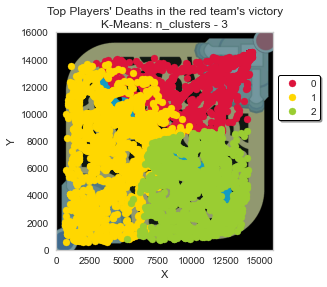

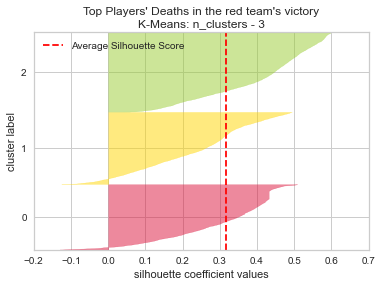

Silhouette score: 0.31684602604244927
2    2996
1    2732
0    2479
Name: cluster, dtype: int64

Inertia: 10267.254924689425

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,9721.318677,11818.952804,-0.706737
1,1,4434.725842,7379.714129,0.035139
2,2,10361.992657,5148.254005,-0.594459


In [178]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["crimson", "gold", "yellowgreen"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [179]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,3093.329623,1806.687457,0.547022
1,1,1923.058794,3114.554616,0.732689
2,2,1724.718528,1941.857226,0.602140


In [180]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,14404.0,2950.0,14582.0,8268.0,1,-1
1,1,9757.0,656.0,13708.0,572.0,1,-1
2,2,14110.0,5225.0,8920.0,757.0,1,-1


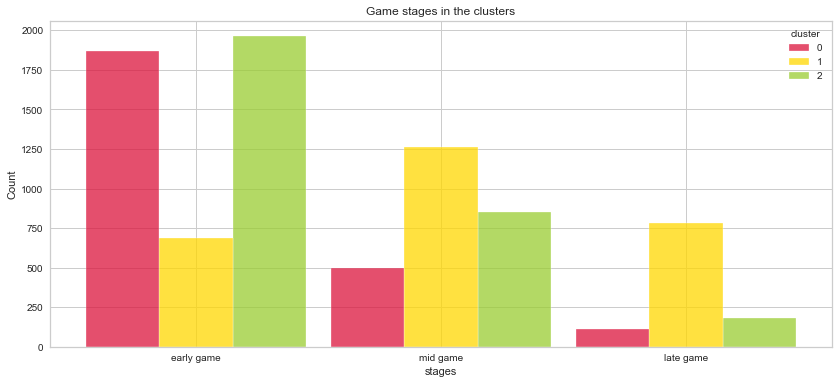

In [181]:
stagesPerClusterV2(redSideVictory_df, colors)

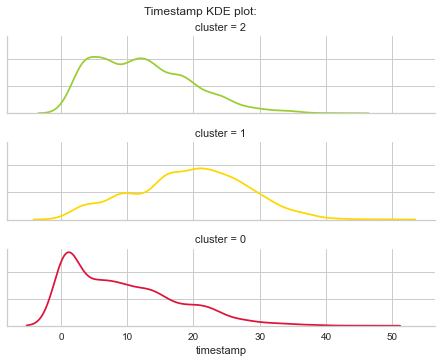

In [182]:
kdeTimestamp(profiling_df, cluster_colors)

K-Means with k = 4

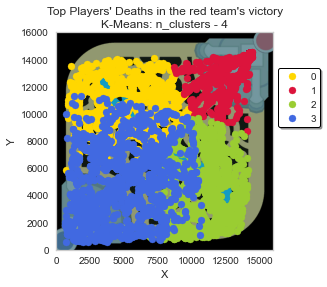

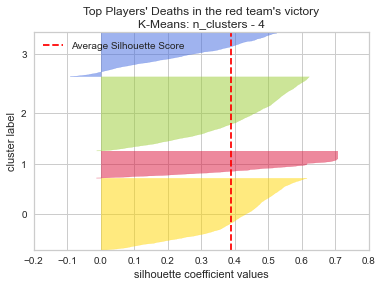

Silhouette score: 0.38982482148303504
2    2811
0    2724
3    1651
1    1021
Name: cluster, dtype: int64

Inertia: 7199.030266636411

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,5843.657856,10292.658590,-0.659325
1,1,13002.705191,13143.558276,-0.560235
2,2,10609.663821,5353.758805,-0.680185
3,3,4991.943671,5074.827983,0.510600


In [183]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "crimson", "yellowgreen", "royalblue"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [184]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1942.457461,1612.211526,0.512635
1,1,1399.642438,1501.856434,0.665025
2,2,1569.290096,2009.948882,0.521841
3,3,2463.633589,2648.484939,0.508298


In [185]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,10140.0,724.0,14089.0,5462.0,1,-1
1,1,14404.0,8699.0,14582.0,8763.0,1,-1
2,2,14110.0,5510.0,9727.0,797.0,1,-1
3,3,10667.0,656.0,11306.0,572.0,1,-1


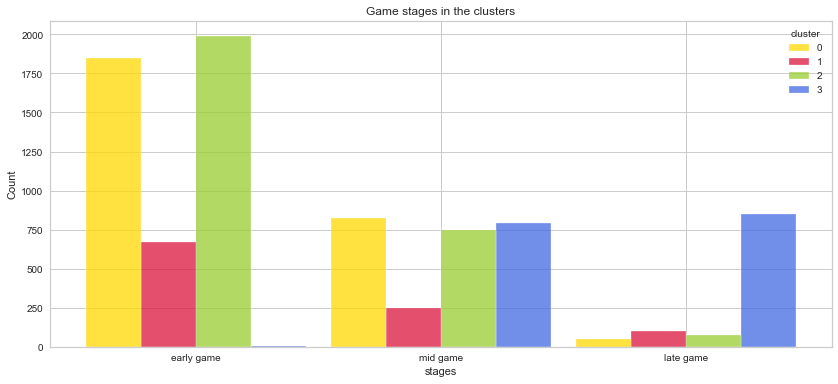

In [186]:
stagesPerClusterV2(redSideVictory_df, colors)

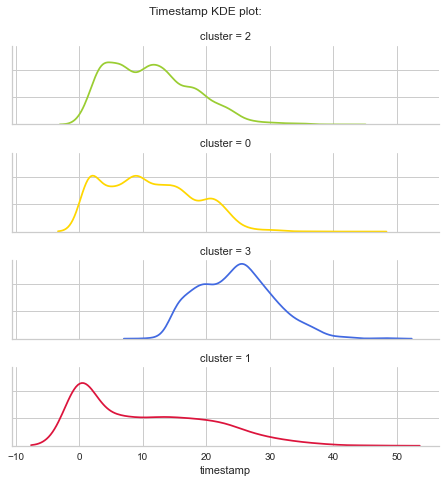

In [187]:
kdeTimestamp(profiling_df, cluster_colors)

K-Means with k = 5

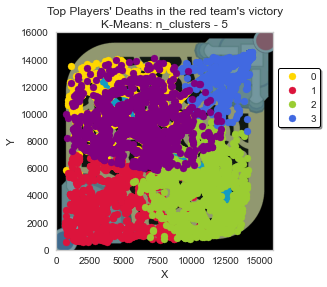

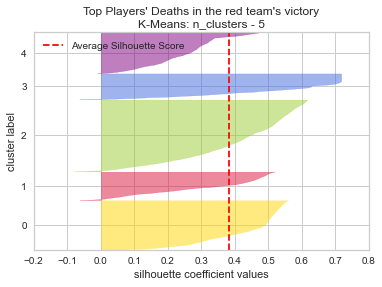

Silhouette score: 0.38391442642527474
2    2729
0    1874
4    1541
1    1078
3     985
Name: cluster, dtype: int64

Inertia: 6090.67778983595

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,5922.098719,10296.881537,-1.000000
1,1,4756.067718,3412.157699,0.477737
2,2,10651.921217,5315.945768,-0.698058
3,3,13096.400000,13222.761421,-0.606091
4,4,5882.705386,9330.586632,0.275146


In [188]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "crimson", "yellowgreen", "royalblue", "purple"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

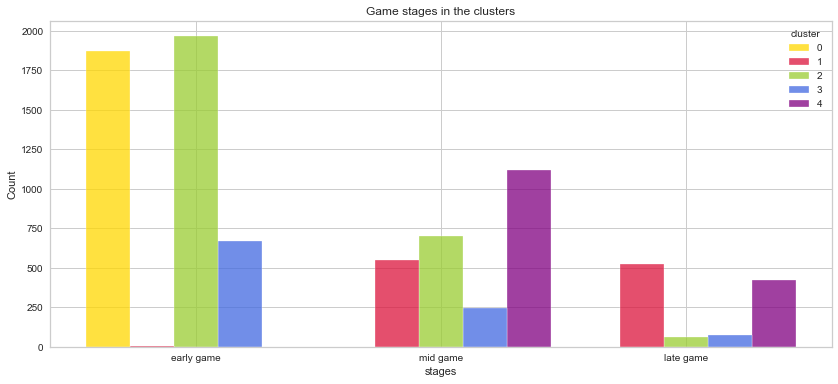

In [189]:
stagesPerClusterV2(redSideVictory_df, colors)

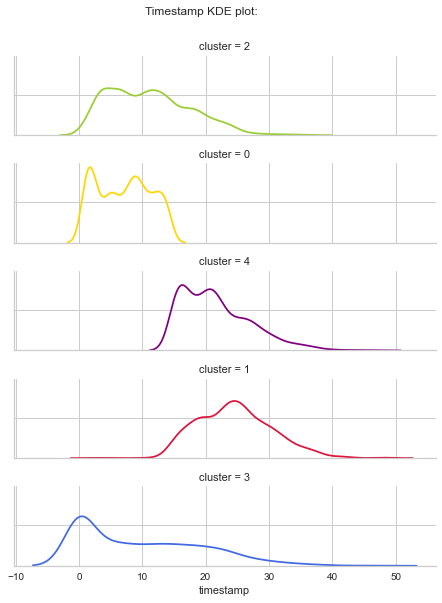

In [190]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [191]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
LeeSin,43
Gragas,22
Vi,22
MonkeyKing,21
Maokai,19
Viego,19
Sylas,18
Nidalee,17
Elise,15
Kindred,13


Deaths with each champion:

In [192]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



LeeSin         1117
Vi              629
Gragas          621
MonkeyKing      621
Viego           549
Maokai          525
Nidalee         447
Sylas           444
Elise           396
Kindred         335
Graves          328
JarvanIV        289
Sejuani         276
Lillia          272
Karthus         268
XinZhao         130
Amumu           108
Kayn             88
Khazix           84
Poppy            81
Trundle          69
AurelionSol      69
Taliyah          63
Talon            58
Rengar           54
Ivern            52
Evelynn          39
Nunu             36
RekSai           35
Qiyana           29
Jayce            27
Diana            25
Hecarim          22
Zed              21
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [193]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 34 champions when they won on the red side

Cluster 0 - died with 34 champions:
 ['Amumu' 'AurelionSol' 'Diana' 'Elise' 'Evelynn' 'Gragas' 'Graves'
 'Hecarim' 'Ivern' 'JarvanIV' 'Jayce' 'Karthus' 'Kayn' 'Khazix' 'Kindred'
 'LeeSin' 'Lillia' 'Maokai' 'MonkeyKing' 'Nidalee' 'Nunu' 'Poppy' 'Qiyana'
 'RekSai' 'Rengar' 'Sejuani' 'Sylas' 'Taliyah' 'Talon' 'Trundle' 'Vi'
 'Viego' 'XinZhao' 'Zed']
LeeSin         269
MonkeyKing     144
Gragas         140
Vi             133
Maokai         108
Nidalee        108
Sylas          105
Viego          104
Elise           90
Kindred         79
Graves          78
Lillia          67
JarvanIV        66
Sejuani         59
Karthus         58
XinZhao         44
Amumu           30
Kayn            28
Khazix          24
Poppy           21
AurelionSol     15
Taliyah         13
Trundle         11
Ivern           11
Rengar          10
Talon           10
Evelynn          9
Nunu             8
Hecarim          7
Jayce            6
Qiyana   

---
### Clustering Red Team Defeat

In [194]:
redSideDefeat_df = top_deaths_df[(top_deaths_df["team"] == "Red") & (top_deaths_df["victory"] == False)]
redSideDefeat_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
5904,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,0.000000,14176.0,14506.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
5905,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,1.000067,8193.0,10180.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
5906,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,2.000383,10360.0,7867.0,2.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
5909,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,3.000767,11796.0,7451.0,3.0,0.0,...,0.0,18.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
5910,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,4.001050,1263.0,11706.0,3.0,0.0,...,64.0,74.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275715,KR_6375903925,Red,anonymous 48,kr,Elise,30.009383,3384.0,11610.0,14.0,35.0,...,1840.0,1319.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275717,KR_6375903925,Red,anonymous 48,kr,Elise,31.009567,9090.0,8635.0,15.0,35.0,...,1972.0,1517.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275719,KR_6375903925,Red,anonymous 48,kr,Elise,32.009900,5828.0,8825.0,16.0,42.0,...,1972.0,1517.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275721,KR_6375903925,Red,anonymous 48,kr,Elise,33.010283,6544.0,14078.0,16.0,42.0,...,2099.0,1736.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [195]:
profiling_df = top_deaths_df[(top_deaths_df["team"] == "Red") & (top_deaths_df["victory"] == False)].copy()

In [196]:
winRateRedSide = (redSideDefeat_df.shape[0]/ redSide_top_deaths_df.shape[0]) * 100
winRateRedSide

38.98594900007434

In [197]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 24 lost 9 matches on the red side
anonymous 24 has an average of 29.0 deaths per game when losing on the red side

anonymous 25 lost 24 matches on the red side
anonymous 25 has an average of 27.375 deaths per game when losing on the red side

anonymous 26 lost 17 matches on the red side
anonymous 26 has an average of 25.88235294117647 deaths per game when losing on the red side

anonymous 27 lost 9 matches on the red side
anonymous 27 has an average of 24.77777777777778 deaths per game when losing on the red side

anonymous 28 lost 5 matches on the red side
anonymous 28 has an average of 31.6 deaths per game when losing on the red side

anonymous 29 lost 10 matches on the red side
anonymous 29 has an average of 25.3 deaths per game when losing on the red side

anonymous 30 lost 10 matches on the red side
anonymous 30 has an average of 31.6 deaths per game when losing on the red side

anonymous 31 lost 16 matches on the red side
anonymous 31 has an average of 28.75 deaths per 

In [198]:
print("Defeat games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 188 matches in which the jungler died at least once
20 players died a total of 5244 times on the red side
Defeat games on red side contains an average of 27.893617021276597 deaths per game


In [199]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

,coordinate_x,coordinate_y,timestamp
5904,14176.0,14506.0,0.000000
5905,8193.0,10180.0,1.000067
5906,10360.0,7867.0,2.000383
5909,11796.0,7451.0,3.000767
5910,1263.0,11706.0,4.001050
...,...,...,...
275715,3384.0,11610.0,30.009383
275717,9090.0,8635.0,31.009567
275719,5828.0,8825.0,32.009900
275721,6544.0,14078.0,33.010283


Time discretization

In [200]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].apply(float)
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[-1, 15, 25, 60],
       labels=["-1", "0", "1"])

In [201]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [202]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [203]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [204]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

,coordinate_x,coordinate_y,timestamp
5904,1.571888,1.660574,-1
5905,-0.271736,0.364576,-1
5906,0.396011,-0.328360,-1
5909,0.838506,-0.452987,-1
5910,-2.407172,0.821740,-1
...,...,...,...
275715,-1.753599,0.792980,1
275717,0.004669,-0.098280,1
275719,-1.000496,-0.041359,1
275721,-0.779865,1.532352,1


In [205]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.29886638054366504


Silhouette score for k=3: 0.38077160813157096
Silhouette score for k=4: 0.3677815018839873
Silhouette score for k=5: 0.34612727020935985
Silhouette score for k=6: 0.34240828885029184
Silhouette score for k=7: 0.32834962350894803
Silhouette score for k=8: 0.33381030620503815
Silhouette score for k=9: 0.351875214851952
Silhouette score for k=10: 0.3616304366221802
Silhouette score for k=11: 0.363000597441628
Silhouette score for k=12: 0.36836254143613817
Silhouette score for k=13: 0.36976455657976426
Silhouette score for k=14: 0.3729148767897357
Silhouette score for k=15: 0.3780014176695606
Silhouette score for k=16: 0.38364443227862954
Silhouette score for k=17: 0.38414573426082155
Silhouette score for k=18: 0.392130425643539
Silhouette score for k=19: 0.4005314488538153
Silhouette score for k=20: 0.4067862111720817
Silhouette score for k=25: 0.4062239443649353


K-Means with k = 3

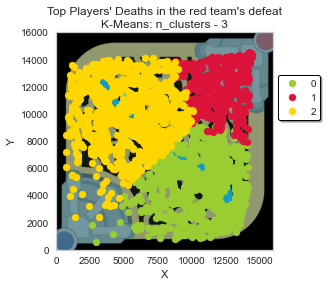

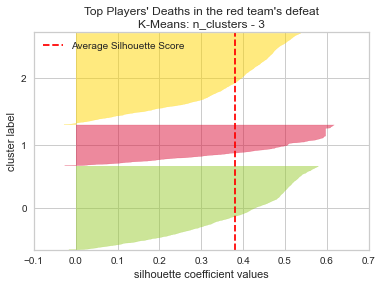

Silhouette score: 0.38077160813157096
2    2218
0    2035
1     991
Name: cluster, dtype: int64

Inertia: 6006.118205873355

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,10559.593120,5706.495823,-0.515479
1,1,12739.145308,12771.995964,-0.186680
2,2,6075.402164,10249.096032,-0.379170


In [206]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "crimson", "gold"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [207]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1778.163411,2018.197658,0.653196
1,1,1474.569780,1634.320317,0.796349
2,2,2002.192516,1883.169300,0.723843


In [208]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,14107.0,2688.0,9845.0,558.0,1,-1
1,1,14404.0,8320.0,14510.0,7924.0,1,-1
2,2,10061.0,752.0,14105.0,2380.0,1,-1


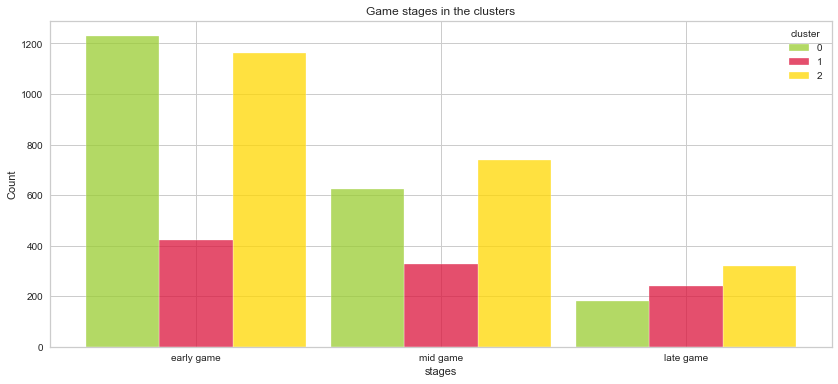

In [209]:
stagesPerClusterV2(redSideDefeat_df, colors)

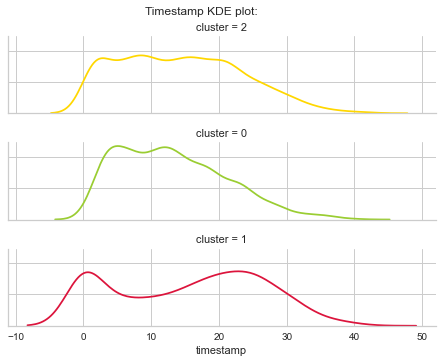

In [210]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [211]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
LeeSin,24
Vi,18
Sylas,15
Nidalee,13
Kindred,12
Viego,12
Gragas,9
Elise,9
MonkeyKing,9
Maokai,6


Deaths with each champion:

In [212]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



LeeSin          680
Vi              508
Sylas           440
Nidalee         357
Viego           313
Kindred         313
Elise           259
MonkeyKing      251
Gragas          245
Maokai          182
Graves          175
Sejuani         167
JarvanIV        162
Lillia          160
Kayn            121
Karthus         113
Amumu            90
Evelynn          86
Ivern            64
Rengar           57
Qiyana           55
XinZhao          50
Taliyah          47
Rammus           40
Hecarim          34
FiddleSticks     32
Belveth          28
Talon            27
Diana            26
RekSai           25
Jayce            25
Trundle          24
Nunu             24
Poppy            23
Mordekaiser      22
Morgana          19
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [213]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 36 champions when they won on the red side

Cluster 0 - died with 36 champions:
 ['Amumu' 'Belveth' 'Diana' 'Elise' 'Evelynn' 'FiddleSticks' 'Gragas'
 'Graves' 'Hecarim' 'Ivern' 'JarvanIV' 'Jayce' 'Karthus' 'Kayn' 'Kindred'
 'LeeSin' 'Lillia' 'Maokai' 'MonkeyKing' 'Mordekaiser' 'Morgana' 'Nidalee'
 'Nunu' 'Poppy' 'Qiyana' 'Rammus' 'RekSai' 'Rengar' 'Sejuani' 'Sylas'
 'Taliyah' 'Talon' 'Trundle' 'Vi' 'Viego' 'XinZhao']
LeeSin          252
Sylas           193
Vi              185
Nidalee         141
Viego           134
Kindred         107
MonkeyKing       95
Elise            93
Gragas           83
Maokai           71
Graves           69
Sejuani          69
JarvanIV         68
Lillia           60
Kayn             48
Karthus          47
Amumu            37
Evelynn          37
Rengar           24
XinZhao          22
Rammus           20
Qiyana           19
Taliyah          18
Ivern            17
FiddleSticks     16
Hecarim          15
RekSai           14
Nunu      

---
### Clustering Blue Team Victory

In [214]:
blueSideVictory_df = top_deaths_df[(top_deaths_df["team"] == "Blue") & (top_deaths_df["victory"] == True)]
blueSideVictory_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
6151,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,0.000000,557.0,345.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6152,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,1.000117,5281.0,9076.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6153,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,2.000583,2682.0,8436.0,2.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6156,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,3.000883,9684.0,2577.0,3.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6158,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,4.001017,11260.0,4972.0,3.0,0.0,...,14.0,48.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275337,NA1_4584631779,Blue,anonymous 37,na1,Gragas,12.002833,10156.0,6798.0,8.0,2.0,...,654.0,69.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275339,NA1_4584631779,Blue,anonymous 37,na1,Gragas,13.003033,10872.0,4964.0,8.0,2.0,...,654.0,69.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275341,NA1_4584631779,Blue,anonymous 37,na1,Gragas,14.003233,11291.0,7501.0,9.0,7.0,...,766.0,69.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275344,NA1_4584631779,Blue,anonymous 37,na1,Gragas,15.003900,6460.0,7863.0,10.0,7.0,...,766.0,69.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [215]:
profiling_df = top_deaths_df[(top_deaths_df["team"] == "Blue") & (top_deaths_df["victory"] == True)].copy()

In [216]:
winsBlueSide = len(np.unique(blueSideVictory_df["gameId"]))

In [217]:
winRateRedSide = (winsBlueSide / gamesBlueSide) * 100
winRateRedSide

49.07161803713528

In [218]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_top_deaths_df.shape[0]) * 100
winRateBlueSide

47.58103767156624

In [219]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 24 won 4 matches on the blue side
anonymous 24 has an average of 28.75 deaths per game when winning on the blue side

anonymous 25 won 10 matches on the blue side
anonymous 25 has an average of 29.2 deaths per game when winning on the blue side

anonymous 26 won 13 matches on the blue side
anonymous 26 has an average of 28.692307692307693 deaths per game when winning on the blue side

anonymous 27 won 5 matches on the blue side
anonymous 27 has an average of 30.6 deaths per game when winning on the blue side

anonymous 28 won 7 matches on the blue side
anonymous 28 has an average of 28.285714285714285 deaths per game when winning on the blue side

anonymous 29 won 13 matches on the blue side
anonymous 29 has an average of 27.0 deaths per game when winning on the blue side

anonymous 30 won 20 matches on the blue side
anonymous 30 has an average of 24.8 deaths per game when winning on the blue side

anonymous 31 won 10 matches on the blue side
anonymous 31 has an average of 27

In [220]:
print("Victory games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 185 matches in which the jungler died at least once
20 players died a total of 4888 times on the blue side
Victory games on blue side contains an average of 26.42162162162162 deaths per game


In [221]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

,coordinate_x,coordinate_y,timestamp
6151,557.0,345.0,0.000000
6152,5281.0,9076.0,1.000117
6153,2682.0,8436.0,2.000583
6156,9684.0,2577.0,3.000883
6158,11260.0,4972.0,4.001017
...,...,...,...
275337,10156.0,6798.0,12.002833
275339,10872.0,4964.0,13.003033
275341,11291.0,7501.0,14.003233
275344,6460.0,7863.0,15.003900


Time discretization

In [222]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].apply(float)
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[-1, 15, 25, 60],
       labels=["-1", "0", "1"])

In [223]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [224]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [225]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [226]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

,coordinate_x,coordinate_y,timestamp
6151,-1.746099,-1.801678,-1
6152,-0.439658,0.665477,-1
6153,-1.158422,0.484630,-1
6156,0.778009,-1.170972,-1
6158,1.213858,-0.494207,-1
...,...,...,...
275337,0.908543,0.021773,-1
275339,1.106555,-0.496468,-1
275341,1.222432,0.220423,-1
275344,-0.113601,0.322715,0


In [227]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.29410740173194905


Silhouette score for k=3: 0.3173071678729598
Silhouette score for k=4: 0.3938439103529703
Silhouette score for k=5: 0.3828056090271596
Silhouette score for k=6: 0.3794746789221755
Silhouette score for k=7: 0.3585899747407712
Silhouette score for k=8: 0.36533890381520695
Silhouette score for k=9: 0.3565506448896501
Silhouette score for k=10: 0.3609694307207413
Silhouette score for k=11: 0.3677538922521385
Silhouette score for k=12: 0.37927650488203307
Silhouette score for k=13: 0.37878064068937595
Silhouette score for k=14: 0.39606237916380027
Silhouette score for k=15: 0.39122627573723046
Silhouette score for k=16: 0.38892613197425174
Silhouette score for k=17: 0.3976169914642337
Silhouette score for k=18: 0.4036204808455022
Silhouette score for k=19: 0.4019667480366132
Silhouette score for k=20: 0.3989165167845303
Silhouette score for k=25: 0.40625602128352745


K-Means with k = 3

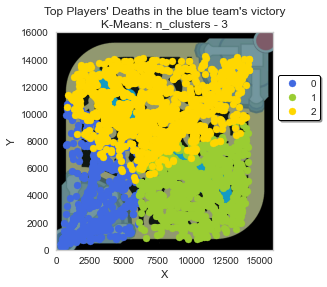

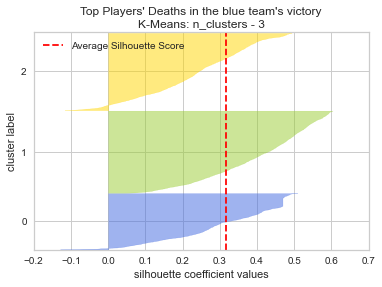

Silhouette score: 0.3173071678729598
1    1860
2    1753
0    1275
Name: cluster, dtype: int64

Inertia: 6144.0873407409235

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2706.680784,4617.676863,-0.668235
1,1,9621.822043,4687.051613,-0.609677
2,2,6980.451226,10408.745009,-0.094695


In [228]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["royalblue", "yellowgreen", "gold"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [229]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1533.205747,3155.610622,0.583877
1,1,2048.888961,1697.196070,0.604920
2,2,3104.830315,1848.062006,0.751602


In [230]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,6192.0,335.0,10725.0,269.0,1,-1
1,1,14122.0,6107.0,9212.0,785.0,1,-1
2,2,14238.0,845.0,14234.0,5130.0,1,-1


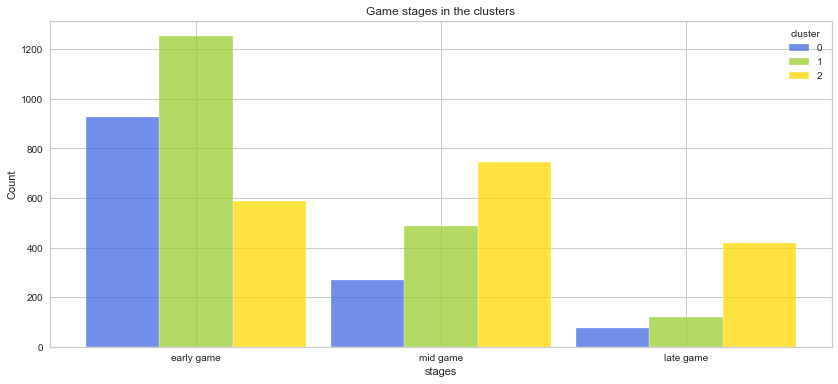

In [231]:
stagesPerClusterV2(blueSideVictory_df, colors)

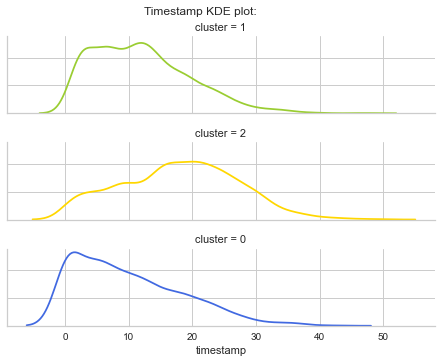

In [232]:
kdeTimestamp(profiling_df, cluster_colors)

K-Means with k = 4

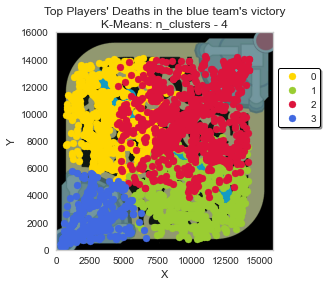

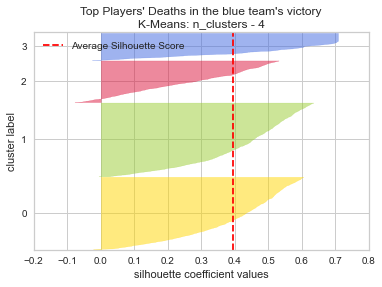

Silhouette score: 0.3938439103529703
1    1676
0    1649
2     946
3     617
Name: cluster, dtype: int64

Inertia: 4253.442046686828

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,4368.576713,9207.335961,-0.621589
1,1,9379.497613,4433.874105,-0.740453
2,2,10016.255814,9734.673362,0.488372
3,3,1920.808752,1667.606159,-0.564019


In [233]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "crimson", "royalblue"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [234]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1591.245339,1967.426747,0.556058
1,1,2039.113910,1577.971617,0.469917
2,2,2502.528447,2530.650513,0.512396
3,3,1554.794693,1447.489690,0.668486


In [235]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,9316.0,724.0,14110.0,4991.0,1,-1
1,1,14122.0,5021.0,9258.0,785.0,1,-1
2,2,14238.0,4529.0,14234.0,3864.0,1,-1
3,3,6595.0,335.0,5808.0,269.0,1,-1


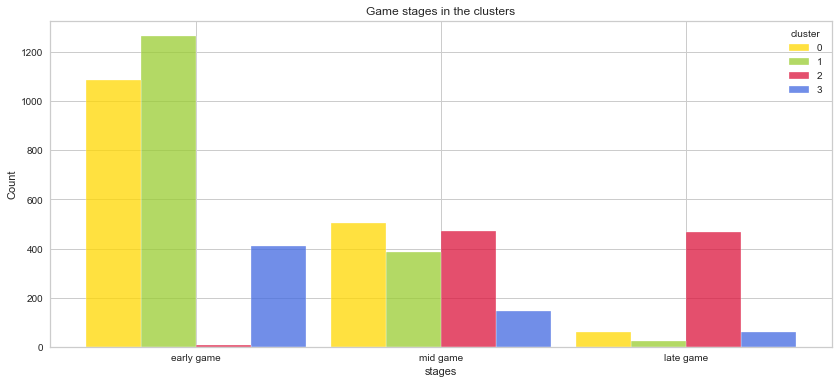

In [236]:
stagesPerClusterV2(blueSideVictory_df, colors)

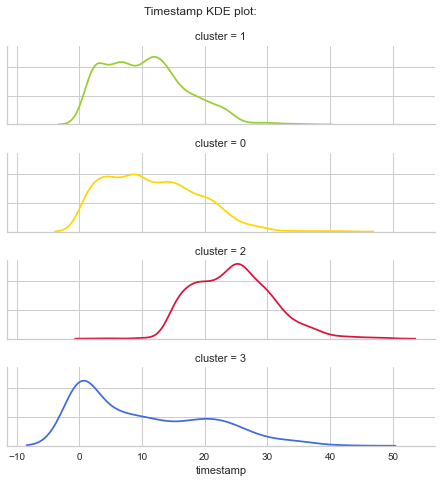

In [237]:
kdeTimestamp(profiling_df, cluster_colors)

K-Means with k = 5

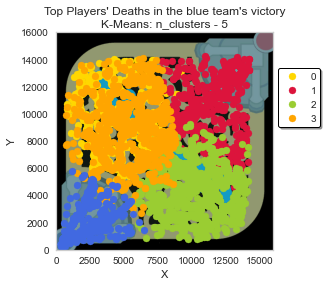

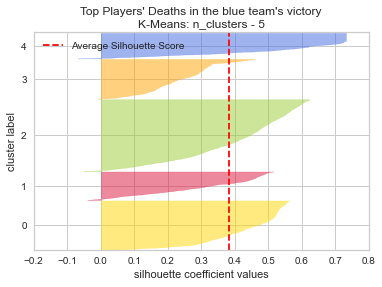

Silhouette score: 0.3828056090271596
2    1636
0    1114
3     906
1     649
4     583
Name: cluster, dtype: int64

Inertia: 3604.8489245308924

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,4408.254039,9104.726212,-1.000000
1,1,11422.983051,9935.776579,0.482280
2,2,9415.905257,4376.442543,-0.743276
3,3,5311.346578,9072.389625,0.253863
4,4,1789.924528,1512.101201,-0.626072


In [238]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "crimson", "yellowgreen", "orange", "royalblue"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

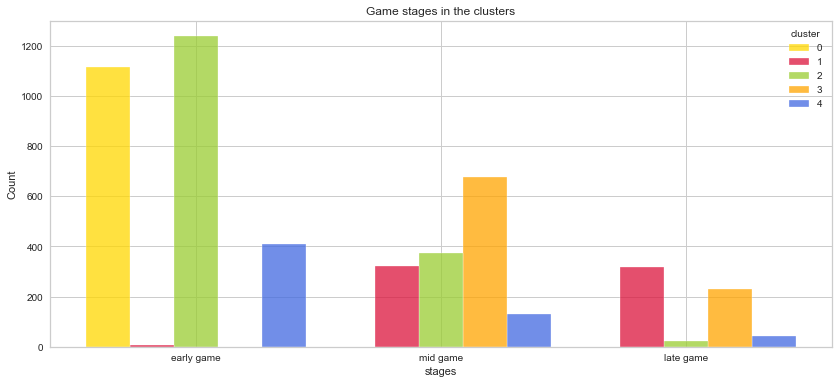

In [239]:
stagesPerClusterV2(blueSideVictory_df, colors)

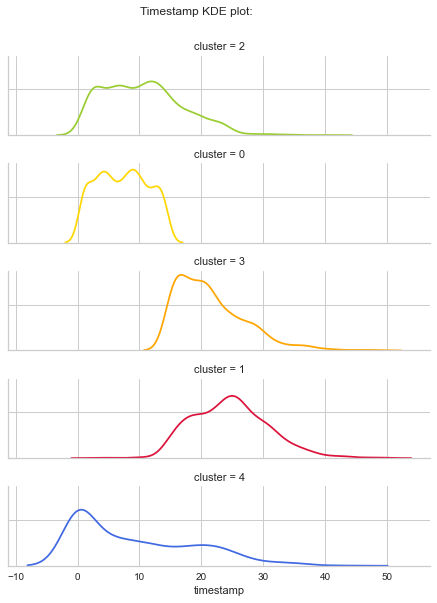

In [240]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [241]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
LeeSin,24
Elise,20
Vi,17
Maokai,16
Kindred,14
Gragas,13
Nidalee,11
Sylas,11
JarvanIV,10
MonkeyKing,9


Deaths with each champion:

In [242]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



LeeSin        668
Elise         502
Vi            469
Maokai        422
Kindred       372
Gragas        325
JarvanIV      293
Sylas         259
MonkeyKing    249
Nidalee       245
Viego         178
Graves        177
Sejuani       132
Rengar         90
Taliyah        70
Talon          64
Lillia         54
Poppy          44
Qiyana         33
Karthus        33
Morgana        32
Khazix         29
RekSai         28
XinZhao        27
Diana          26
Camille        17
Ekko           17
Evelynn        17
Kayn           16
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [243]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 29 champions when they won on the red side

Cluster 0 - died with 29 champions:
 ['Camille' 'Diana' 'Ekko' 'Elise' 'Evelynn' 'Gragas' 'Graves' 'JarvanIV'
 'Karthus' 'Kayn' 'Khazix' 'Kindred' 'LeeSin' 'Lillia' 'Maokai'
 'MonkeyKing' 'Morgana' 'Nidalee' 'Poppy' 'Qiyana' 'RekSai' 'Rengar'
 'Sejuani' 'Sylas' 'Taliyah' 'Talon' 'Vi' 'Viego' 'XinZhao']
LeeSin        147
Elise         131
Vi            113
Maokai         99
Kindred        96
Gragas         68
MonkeyKing     59
Sylas          57
Nidalee        55
JarvanIV       50
Graves         34
Viego          32
Sejuani        31
Rengar         18
Taliyah        18
Talon          14
Lillia         12
Poppy          10
Diana           9
Khazix          8
Karthus         8
XinZhao         8
Ekko            7
Qiyana          7
RekSai          6
Kayn            5
Morgana         5
Evelynn         4
Camille         3
Name: champion, dtype: int64

Cluster 1 - died with 26 champions:
 ['Diana' 'Ekko' 'Elise' 'Gragas' 'G

---
### Clustering Blue Team Defeat

In [244]:
blueSideDefeat_df = top_deaths_df[(top_deaths_df["team"] == "Blue") & (top_deaths_df["victory"] == False)]
blueSideDefeat_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
6466,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,0.000000,557.0,345.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6467,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,1.000083,5170.0,8539.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6468,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,2.000300,2603.0,8236.0,2.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6471,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,3.000350,6579.0,3050.0,3.0,0.0,...,0.0,24.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6473,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,4.000467,5093.0,9429.0,3.0,0.0,...,0.0,40.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275394,NA1_4584524732,Blue,anonymous 41,na1,Poppy,26.009117,2980.0,11546.0,13.0,18.0,...,1304.0,784.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275396,NA1_4584524732,Blue,anonymous 41,na1,Poppy,27.009233,3041.0,8132.0,13.0,18.0,...,1304.0,784.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275397,NA1_4584524732,Blue,anonymous 41,na1,Poppy,28.009250,7145.0,4977.0,14.0,21.0,...,1304.0,912.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275400,NA1_4584524732,Blue,anonymous 41,na1,Poppy,29.009800,2580.0,10011.0,14.0,22.0,...,1431.0,912.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [245]:
profiling_df = top_deaths_df[(top_deaths_df["team"] == "Blue") & (top_deaths_df["victory"] == False)].copy()

In [246]:
winRateBlueSide = (blueSideDefeat_df.shape[0]/ blueSide_top_deaths_df.shape[0]) * 100
winRateBlueSide

52.41896232843376

In [247]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 24 lost 10 matches on the blue side
anonymous 24 has an average of 25.8 deaths per game when losing on the blue side

anonymous 25 lost 10 matches on the blue side
anonymous 25 has an average of 30.6 deaths per game when losing on the blue side

anonymous 26 lost 18 matches on the blue side
anonymous 26 has an average of 26.77777777777778 deaths per game when losing on the blue side

anonymous 27 lost 10 matches on the blue side
anonymous 27 has an average of 27.0 deaths per game when losing on the blue side

anonymous 28 lost 1 matches on the blue side
anonymous 28 has an average of 38.0 deaths per game when losing on the blue side

anonymous 29 lost 20 matches on the blue side
anonymous 29 has an average of 30.2 deaths per game when losing on the blue side

anonymous 30 lost 14 matches on the blue side
anonymous 30 has an average of 28.0 deaths per game when losing on the blue side

anonymous 31 lost 12 matches on the blue side
anonymous 31 has an average of 28.0 deaths per

In [248]:
print("Defeat games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 192 matches in which the jungler died at least once
20 players died a total of 5385 times on the blue side
Defeat games on blue side contains an average of 28.046875 deaths per game


In [249]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

,coordinate_x,coordinate_y,timestamp
6466,557.0,345.0,0.000000
6467,5170.0,8539.0,1.000083
6468,2603.0,8236.0,2.000300
6471,6579.0,3050.0,3.000350
6473,5093.0,9429.0,4.000467
...,...,...,...
275394,2980.0,11546.0,26.009117
275396,3041.0,8132.0,27.009233
275397,7145.0,4977.0,28.009250
275400,2580.0,10011.0,29.009800


Time discretization

In [250]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].apply(float)
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[-1, 15, 25, 60],
       labels=["-1", "0", "1"])

In [251]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [252]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [253]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [254]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

,coordinate_x,coordinate_y,timestamp
6466,-1.576985,-1.679879,-1
6467,-0.178852,0.833634,-1
6468,-0.956872,0.740689,-1
6471,0.248196,-0.850119,-1
6473,-0.202189,1.106642,-1
...,...,...,...
275394,-0.842609,1.756033,1
275396,-0.824121,0.708787,1
275397,0.419742,-0.259011,1
275400,-0.963843,1.285171,1


In [255]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.3007059920160977


Silhouette score for k=3: 0.38399948223986374
Silhouette score for k=4: 0.3637260188379195
Silhouette score for k=5: 0.34443992998129247
Silhouette score for k=6: 0.3405892661058832
Silhouette score for k=7: 0.33552799642968956
Silhouette score for k=8: 0.3301053703565738
Silhouette score for k=9: 0.33975202606589056
Silhouette score for k=10: 0.34144973599964445
Silhouette score for k=11: 0.35163200535644684
Silhouette score for k=12: 0.3481071200064075
Silhouette score for k=13: 0.35188123349899525
Silhouette score for k=14: 0.36156418146046576
Silhouette score for k=15: 0.3692227883357457
Silhouette score for k=16: 0.36713913900823614
Silhouette score for k=17: 0.3775325474664993
Silhouette score for k=18: 0.38540665397140234
Silhouette score for k=19: 0.39018667535969154
Silhouette score for k=20: 0.3958593958578311
Silhouette score for k=25: 0.3987992188332638


K-Means with k = 3

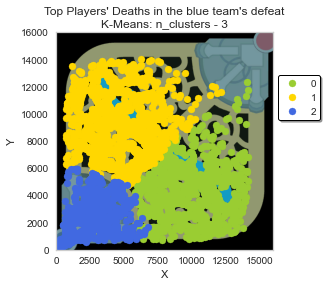

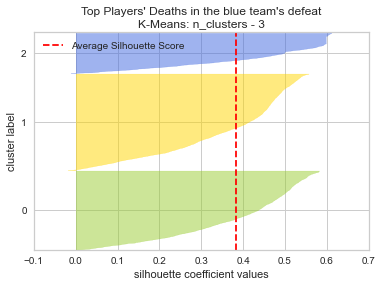

Silhouette score: 0.38399948223986374
1    2410
0    1968
2    1007
Name: cluster, dtype: int64

Inertia: 6119.650154056088

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,9162.263211,4264.776423,-0.523882
1,1,4504.617427,8707.422822,-0.357261
2,2,2115.878848,1956.412115,-0.198610


In [256]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "royalblue"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [257]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2061.175905,1725.560497,0.664457
1,1,1796.225536,1948.566363,0.718285
2,2,1586.179629,1522.424790,0.809746


In [258]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,14128.0,4890.0,12362.0,748.0,1,-1
1,1,12114.0,713.0,14026.0,4757.0,1,-1
2,2,6747.0,186.0,5979.0,205.0,1,-1


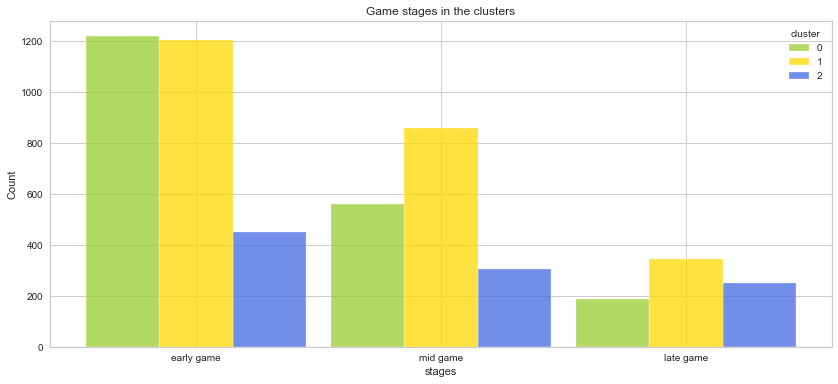

In [259]:
stagesPerClusterV2(blueSideDefeat_df, colors)

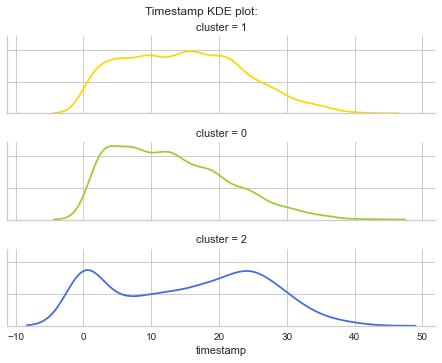

In [260]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [261]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
LeeSin,22
Graves,16
Gragas,15
Nidalee,13
MonkeyKing,13
Vi,12
Elise,12
Maokai,11
Kindred,11
Sylas,10


Deaths with each champion:

In [262]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



LeeSin         604
Gragas         467
Graves         444
Nidalee        381
MonkeyKing     362
Elise          329
Vi             309
Sylas          302
Kindred        300
Maokai         287
Viego          223
Sejuani        169
Poppy          144
Lillia          96
Qiyana          96
Karthus         86
Rengar          75
JarvanIV        67
Rumble          63
Morgana         52
Ivern           48
Taliyah         47
XinZhao         45
Belveth         44
Amumu           42
Hecarim         42
Ryze            37
RekSai          36
Diana           33
Zac             33
Volibear        28
Nunu            26
AurelionSol     23
Trundle         23
Khazix          22
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [263]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 35 champions when they won on the red side

Cluster 0 - died with 35 champions:
 ['Amumu' 'AurelionSol' 'Belveth' 'Diana' 'Elise' 'Gragas' 'Graves'
 'Hecarim' 'Ivern' 'JarvanIV' 'Karthus' 'Khazix' 'Kindred' 'LeeSin'
 'Lillia' 'Maokai' 'MonkeyKing' 'Morgana' 'Nidalee' 'Nunu' 'Poppy'
 'Qiyana' 'RekSai' 'Rengar' 'Rumble' 'Ryze' 'Sejuani' 'Sylas' 'Taliyah'
 'Trundle' 'Vi' 'Viego' 'Volibear' 'XinZhao' 'Zac']
LeeSin         213
Gragas         163
Graves         159
Nidalee        134
MonkeyKing     128
Elise          124
Vi             116
Sylas          115
Kindred        111
Maokai         107
Viego           78
Sejuani         63
Poppy           57
JarvanIV        41
Lillia          36
Qiyana          32
Karthus         31
Rumble          25
Rengar          22
Taliyah         21
Morgana         20
Amumu           20
Hecarim         18
Ivern           17
XinZhao         14
Belveth         14
Zac             14
Diana           12
RekSai          12
Ryze          

---

### Blue Win Rate vs Red Win Rate

In [264]:
wins_df = top_deaths_df[top_deaths_df["victory"] == True]
wins_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
6027,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,0.000000,14176.0,14506.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6028,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,1.000400,6759.0,9676.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6029,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,2.000783,11252.0,6975.0,2.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6032,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,3.000950,7997.0,6232.0,3.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
6034,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,4.001467,11488.0,7976.0,3.0,4.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275770,KR_6376019501,Red,anonymous 49,kr,Gragas,20.005683,10601.0,7668.0,11.0,5.0,...,802.0,419.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275772,KR_6376019501,Red,anonymous 49,kr,Gragas,21.005883,4514.0,10154.0,11.0,6.0,...,976.0,522.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275773,KR_6376019501,Red,anonymous 49,kr,Gragas,22.006183,9666.0,3361.0,12.0,6.0,...,1028.0,522.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
275776,KR_6376019501,Red,anonymous 49,kr,Gragas,23.006417,1082.0,1188.0,13.0,8.0,...,1353.0,1522.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [265]:
wins = len(np.unique(wins_df["gameId"]))
wins

486

In [266]:
b = (winsBlueSide/ wins) * 100
r = (winsRedSide/ wins) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 61.934156378600825 vs Blue: 38.065843621399175


In [267]:
b = (blueSideVictory_df.shape[0]/ wins_df.shape[0]) * 100
r = (redSideVictory_df.shape[0]/ wins_df.shape[0]) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 62.67277586865215 vs Blue: 37.32722413134784
